In [3]:
from keras.models import Sequential
from keras.layers import Convolution2D, Flatten, Dense, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen=ImageDataGenerator(horizontal_flip=True,rescale=1./255,zoom_range=0.2)

In [5]:
test_datagen=ImageDataGenerator(rescale=1./255)

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
X_train=train_datagen.flow_from_directory("/content/drive/MyDrive/Coal Classification/",target_size=(128,128),class_mode='categorical',batch_size=4)

Found 351 images belonging to 4 classes.


In [8]:
X_test=test_datagen.flow_from_directory("/content/drive/MyDrive/Coal Classification/",target_size=(128,128),class_mode='categorical',batch_size=4)

Found 351 images belonging to 4 classes.


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import Adam

In [10]:
#initialising the model
model=Sequential()

In [11]:
#adding the cnn
model.add(Convolution2D(32,(3,3),input_shape=(128,128,3),activation='relu'))

In [12]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [13]:
model.add(Convolution2D(32,(3,3),activation='relu'))

In [14]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [15]:
model.add(Flatten())

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
Total params: 10,144
Trainable params: 10,144
Non-traina

In [17]:
#denser layers
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 300)               8

In [18]:
model.compile(optimizer="adam",loss="categorical_crossentropy", metrics=['accuracy'])

In [19]:
#training the model 
model.fit_generator(X_train,validation_data=X_test,epochs=30)

<ipython-input-19-7ba4333ebd5e>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(X_train,validation_data=X_test,epochs=30)


Epoch 1/30
88/88 [==============================] - 82s 912ms/step - loss: 1.6028 - accuracy: 0.2735 - val_loss: 1.3175 - val_accuracy: 0.3647
Epoch 2/30
88/88 [==============================] - 29s 332ms/step - loss: 1.3409 - accuracy: 0.3305 - val_loss: 1.3241 - val_accuracy: 0.4046
Epoch 3/30
88/88 [==============================] - 29s 331ms/step - loss: 1.3244 - accuracy: 0.3618 - val_loss: 2.7878 - val_accuracy: 0.2877
Epoch 4/30
88/88 [==============================] - 29s 332ms/step - loss: 1.3331 - accuracy: 0.3675 - val_loss: 1.2288 - val_accuracy: 0.3846
Epoch 5/30
88/88 [==============================] - 29s 330ms/step - loss: 1.2836 - accuracy: 0.3846 - val_loss: 1.3128 - val_accuracy: 0.3761
Epoch 6/30
88/88 [==============================] - 29s 329ms/step - loss: 1.2489 - accuracy: 0.4530 - val_loss: 1.3061 - val_accuracy: 0.4387
Epoch 7/30
88/88 [==============================] - 29s 327ms/step - loss: 1.1878 - accuracy: 0.4843 - val_loss: 1.0498 - val_accuracy: 0.5470

In [27]:
#saving the model
model.save('coal.h5')

In [24]:
import numpy as np


In [25]:
#testing the model
from tensorflow.keras.preprocessing import image

In [75]:
from tensorflow.keras.models import load_model
model.load_weights('coal.h5')

In [110]:
img=image.load_img("/content/5.jpg",target_size=(128,128))
x=image.img_to_array(img)
x.shape

(128, 128, 3)

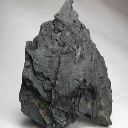

In [111]:
img

In [112]:
x=np.expand_dims(x,axis=0)
x.shape

(1, 128, 128, 3)

In [113]:
prediction=model.predict(x)
prediction

1/1 [==============================] - 0s 53ms/step


array([[0., 1., 0., 0.]], dtype=float32)

In [114]:
index=["Anthracite","Bituminous","Lignite","Peat"]

In [115]:
result=str(index[prediction[0].tolist().index(1)])
result

'Bituminous'